# k-Nearest Neighbors Regression
We now apply k-nearest neighbor to regression problems. First, we apply it to some simple generated data and then to the housing data that we used in the earlier experiments.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import pandas as pd
%matplotlib inline

Let's generate some sample data using a fixed random seed to be able to reproduce the analysis later.

In [2]:
np.random.seed(1234)
x = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(x).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

Fit regression model with k of 5

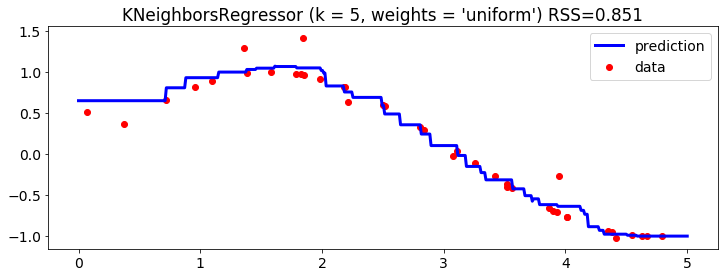

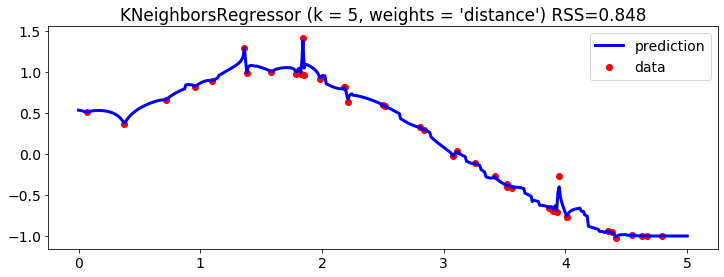

In [3]:
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(x, y).predict(T)
    
    scores = cross_val_score(knn, x, y, cv=KFold(n_splits=10, random_state=1234, shuffle=True))
    
    plt.figure(figsize=(12,9))
    font = {'family' : 'sans', 'size'   : 14}
    plt.rc('font', **font)
    plt.subplot(2, 1, i + 1)
    plt.scatter(x, y, c='red', label='data');
    plt.plot(T, y_, c='blue', label='prediction', linewidth=3);
    plt.axis('tight');
    plt.legend();
    plt.title("KNeighborsRegressor (k = %i, weights = '%s') RSS=%.3f" % (n_neighbors, weights, np.average(scores)));

plt.show();

Let's repeat the experiment using the housing data.

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

In [10]:
X = dataset['LSTAT'].values.reshape(506, 1)
y = dataset['MEDV'].values.reshape(506, 1)
T = np.linspace(np.min(x), np.max(x), 500)[:, np.newaxis]

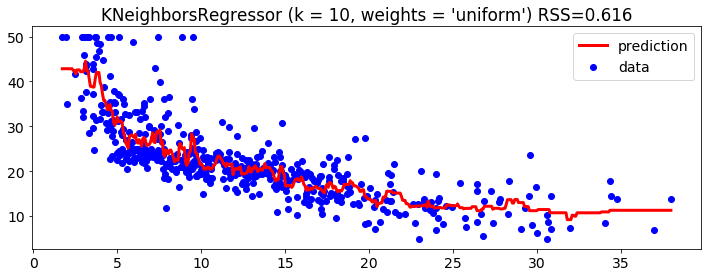

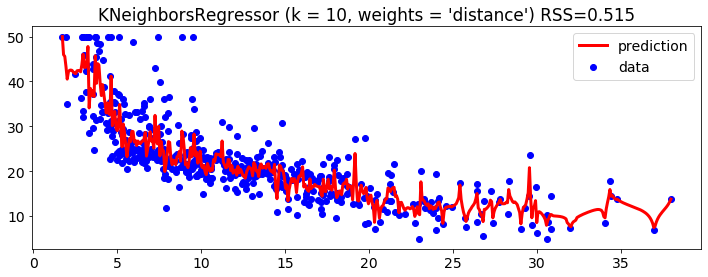

In [11]:
n_neighbors = 10

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)
    
    scores = cross_val_score(knn, x, y, cv=KFold(n_splits=10, random_state=1234, shuffle=True))
    
    plt.figure(figsize=(12,9))
    font = {'family' : 'sans', 'size'   : 14}
    plt.rc('font', **font)
    plt.subplot(2, 1, i + 1)
    plt.scatter(x, y, c='blue', label='data');
    plt.plot(T, y_, c='red', linewidth=3, label='prediction');
    plt.axis('tight');
    plt.legend();
    plt.title("KNeighborsRegressor (k = %i, weights = '%s') RSS=%.3f" % (n_neighbors, weights, np.average(scores)));

plt.show();

Note that this is still an evaluation on training data. How does the prediction change when the value of k is decreased or increased?